In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

In [2]:
def plot_norm_samples(samples, marker, loc=0, scale=1):
    plt.plot(np.sort(samples), tuple(norm.pdf(sample, loc=loc, scale=scale) for sample in np.sort(samples)), marker)

real norm distribution loc 3, scale 11
fitted norm distribution loc 3.4593645373726853, scale 11.52669369539748.
real norm distribution loc 10, scale 17
fitted norm distribution loc 12.544623404280896, scale 20.295918921738675.
real norm distribution loc 2, scale 3
fitted norm distribution loc 1.9163283696976008, scale 2.9683485245937735.
real norm distribution loc -6, scale 18
fitted norm distribution loc -6.721727243524987, scale 18.52000902141161.


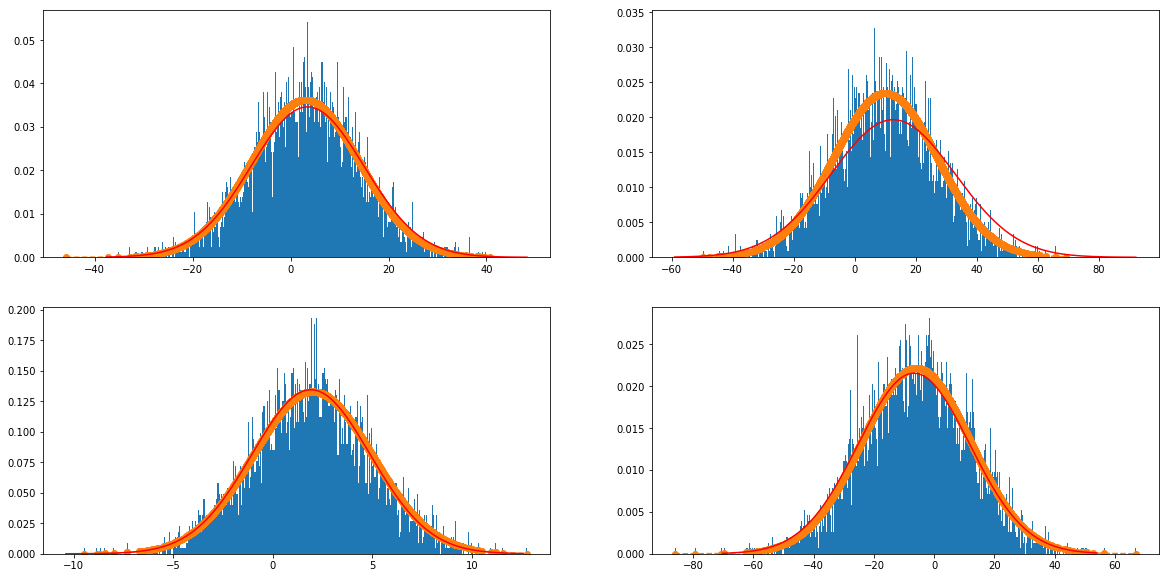

In [6]:
sample_round = 4

f0 = plt.figure(0)
f0.set_size_inches(20, 10)

for i in range(sample_round):
    sample_num = np.random.randint(2000, 10000)
    loc = np.random.randint(-10, 11)
    scale = np.random.randint(1, 20)
    samples = norm.rvs(loc=loc, scale=scale, size=sample_num)
    bins = len(samples) // 10
    
    plt.subplot(sample_round // 2, 2, i + 1)
    
    plt.hist(samples, density=True, bins=bins)
    plot_norm_samples(samples, 'o--', loc=loc, scale=scale)
    
    density, pivots = np.histogram(samples, bins=bins * 3, density=True)
    
    def residual_prob_error(x):
        error = 0
        loc, scale = x
        for i in range(1, len(pivots)):
            p1 = norm.cdf(pivots[i], loc=loc, scale=scale) - norm.cdf(pivots[i - 1], loc=loc, scale=scale)
            p2 = (pivots[i] - pivots[i - 1]) * density[i - 1]
            error += (p1 - p2) ** 2
        
        return error
    
    ret = minimize(residual_prob_error, [0, 1])
    f_loc, f_scale = ret.x
    print(f'real norm distribution loc {loc}, scale {scale}')
    print(f'fitted norm distribution loc {f_loc}, scale {f_scale}.')
    plot_norm_samples(norm.rvs(loc=f_loc, scale=f_scale, size=sample_num), 'r-', loc=f_loc, scale=f_scale)